In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6) #set default figure size
rng = np.random.default_rng() # random generator

In [2]:
# parameters
N = 1000 # number of steps
Z0 = 100 # initial value
mu = 0.05 # drift
sigma = 0.2 # volatility
T = 1 # time horizon
dt = T / N # time step

Two ways to simulate the GBM:
1. Simulate the GBM directly
   
\begin{align*}
Z(t_i) = Z(t_{i-1}) \cdot \exp\left(\left(\mu - \frac{1}{2}\sigma^2\right)\Delta t + \sigma \Delta B\right)
\end{align*}

1. Approximate the GBM by a discretized version of the SDE

\begin{align*}
\Delta \tilde{Z}(t_i) = \tilde{Z}(t_{i-1}) \cdot \left[ \mu \Delta t + \sigma \Delta B \right] \\
\tilde{Z}(t_i) = \tilde{Z}(t_{i-1}) \cdot \left[1 + \mu \Delta t + \sigma \Delta B\right]
\end{align*} 

In [3]:
# simulate the two process
Z = np.zeros(N + 1)
Z[0] = Z0

Z_tilde = np.zeros(N + 1)
Z_tilde[0] = Z0

# for loop version
"""
for i in range(N):
    dB = rng.standard_normal() * np.sqrt(dt)
    Z_tilde[i + 1] = Z_tilde[i] * (1 + mu * dt + sigma * dB)
    Z[i + 1] = Z[i] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * dB)
"""

# vectorized version
dB = rng.standard_normal(N) * np.sqrt(dt)
Z[1:] = Z[0] * np.cumprod(np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * dB))
Z_tilde[1:] = Z_tilde[0] * np.cumprod(1 + mu * dt + sigma * dB)

# difference
diff = Z - Z_tilde

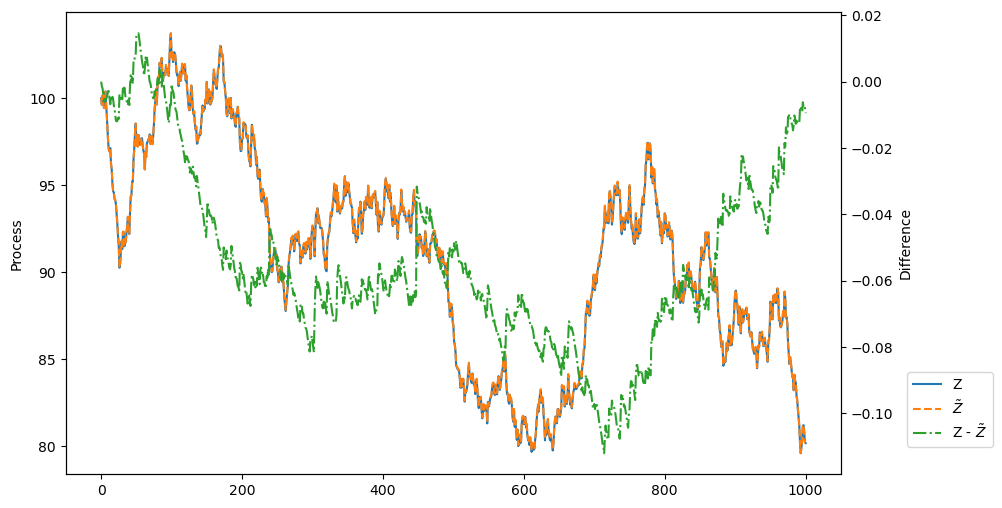

In [4]:
# plot
fig, ax1 = plt.subplots()
lnsZ = ax1.plot(Z, color="C0", linestyle="-")
lnsZ_t = ax1.plot(Z_tilde, color="C1", linestyle="--")
ax1.set_ylabel("Process", color="k")
ax2 = ax1.twinx()
lnsdiff = ax2.plot(diff, color="C2", linestyle="-.")
ax2.set_ylabel("Difference", color="k")
lns = lnsZ + lnsZ_t + lnsdiff
ax1.legend(lns, ["Z", r"$\tilde{Z}$", r"Z - $\tilde{Z}$"], 
           bbox_to_anchor=(1.05, 0), loc=3, borderaxespad=2)
plt.show()